In [1]:
#importação das bibliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 
from statsmodels.tsa.arima_model import ARIMA

In [2]:
#carregamento da base de dados da usina
p1gd = pd.read_csv('Plant_1_Generation_Data.csv')
p1wd = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

Pré-processamento

In [3]:
p1gd.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
p1wd.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [5]:
p1gd.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [6]:
p1wd.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [7]:
p1gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [8]:
p1wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [9]:
p1wd.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [10]:
p1gd.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [11]:
#Convertendo as datas para DateTime
p1gd['DATE_TIME'] = pd.to_datetime(p1gd['DATE_TIME'],format = '%d-%m-%Y %H:%M')
p1wd['DATE_TIME'] = pd.to_datetime(p1wd['DATE_TIME'],format = '%Y-%m-%d %H:%M')

In [12]:
# Splitting date and time in separate columns 
p1gd['DATE'] = p1gd['DATE_TIME'].apply(lambda x:x.date())
p1gd['TIME'] = p1gd['DATE_TIME'].apply(lambda x:x.time())
p1wd['DATE'] = p1wd['DATE_TIME'].apply(lambda x:x.date())
p1wd['TIME'] = p1wd['DATE_TIME'].apply(lambda x:x.time())

In [13]:
p1wd.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0,2020-06-17,22:45:00
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0,2020-06-17,23:00:00
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0,2020-06-17,23:15:00
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0,2020-06-17,23:30:00
3181,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,2020-06-17,23:45:00


TypeError: 'AxesSubplot' object is not subscriptable

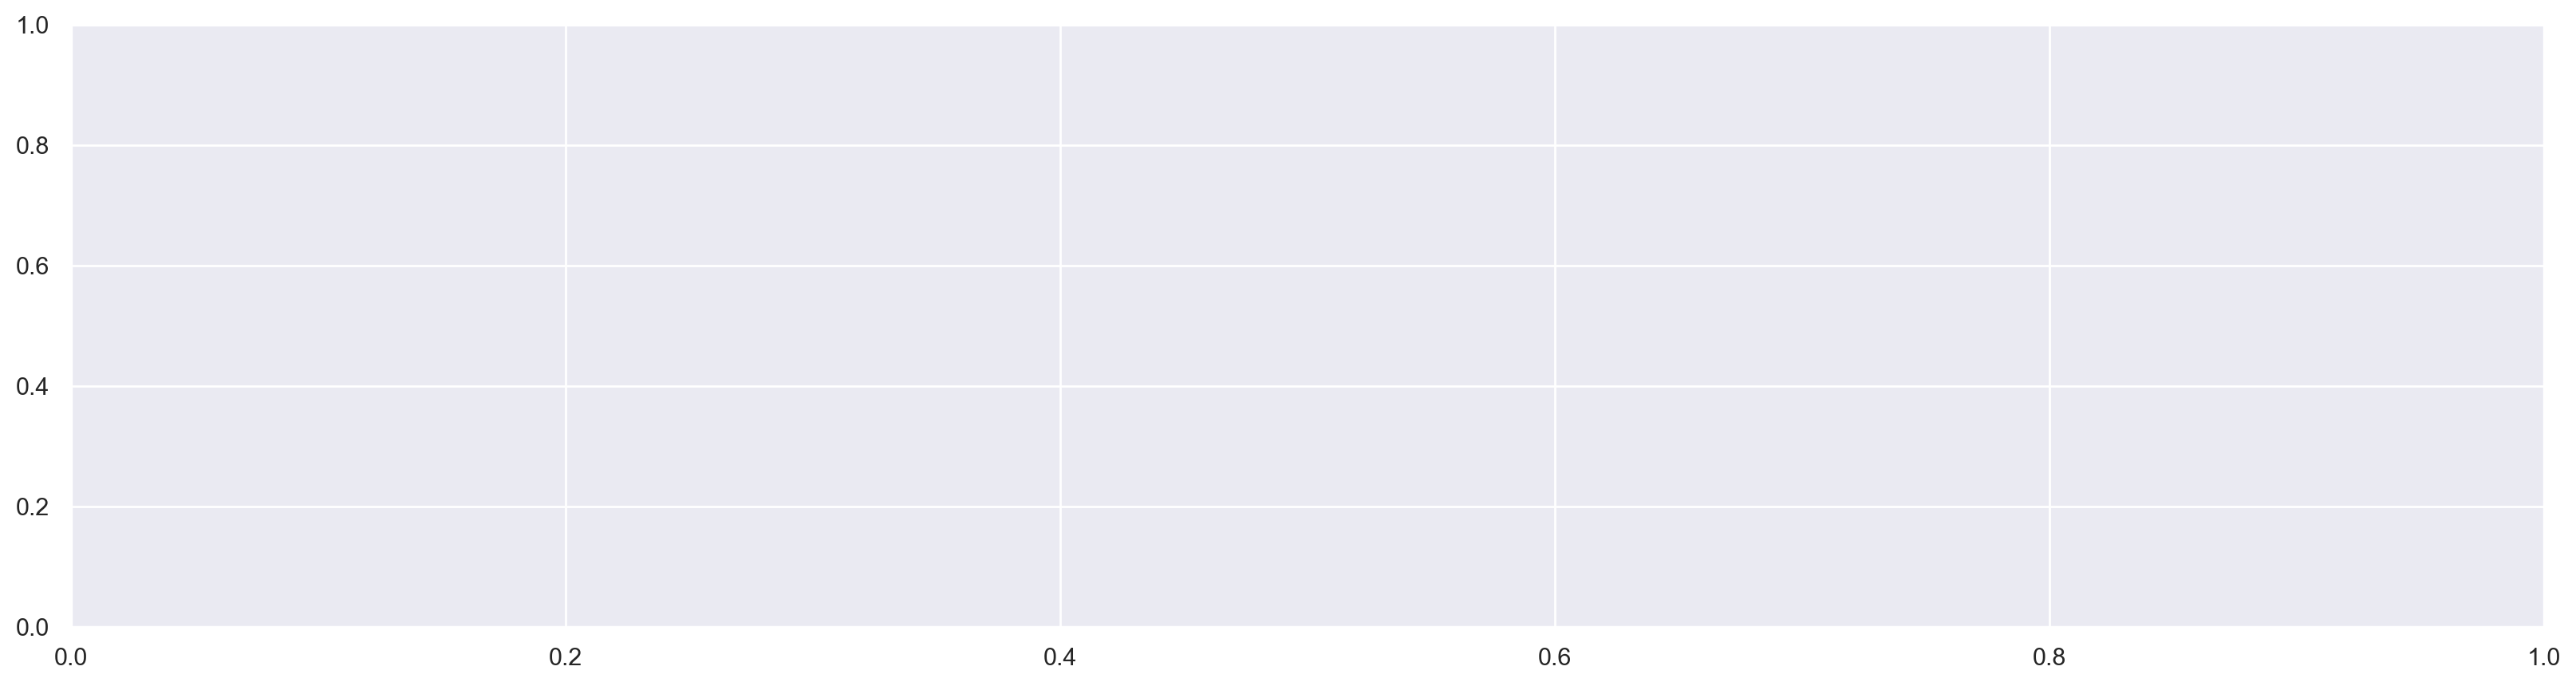

In [14]:
#GeraçãodosMódulosFV
p1_dc_pot = p1gd.copy()
p1_dc_pot = p1_dc_pot.groupby(['TIME','SOURCE_KEY'])['DC_POWER'].mean().unstack()

fig,ax=plt.subplots(ncols=1,nrows=1,dpi=200,figsize=(20,5))
ax[0].set_title('Potência DC em um inversor Usina 1')
ax[0].set_ylabel('kW')
p1_dc_pot.iloc[:,0:1].plot(ax=ax[0],linewidth = 5)

In [ ]:

p1gd_Inv= p1gd.groupby(['SOURCE_KEY']).mean()
eficiencia= p1gd_Inv['AC_POWER']*100/p1gd_Inv['DC_POWER']
eficiencia.plot(figsize=(15,5), style='o--')
plt.axhline(eficiencia.mean(),linestyle='--',color='green')
plt.title('Eficiência dos Inversores', size=20)
plt.ylabel('Eficiência %')

In [ ]:
#Energia Transformada Pelo Inversor
p1_ac_pot = p1gd.copy()
p1_ac_pot = p1_ac_pot.groupby(['TIME','DATE'])['AC_POWER'].sum().unstack()

fig,ax=plt.subplots(ncols=2,nrows=1,dpi=200,figsize=(20,5))
ax[0].set_title('Potência AC em um inversor Usina 1')
ax[0].set_ylabel('kW')

p1_ac_pot.iloc[:,0:1].plot(ax=ax[0],linewidth = 5)

In [15]:
#Agrupando os dados pela data
p1gd_date = p1gd.groupby(['DATE_TIME'],as_index=False).sum()
p1gd_date

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,86835021,0.0,0.0,0.000000,143581676.0
1,2020-05-15 00:15:00,86835021,0.0,0.0,0.000000,143581676.0
2,2020-05-15 00:30:00,86835021,0.0,0.0,0.000000,143581676.0
3,2020-05-15 00:45:00,86835021,0.0,0.0,0.000000,143581676.0
4,2020-05-15 01:00:00,90970022,0.0,0.0,0.000000,150761642.0
...,...,...,...,...,...,...
3153,2020-06-17 22:45:00,90970022,0.0,0.0,129571.000000,156142755.0
3154,2020-06-17 23:00:00,90970022,0.0,0.0,129571.000000,156142755.0
3155,2020-06-17 23:15:00,90970022,0.0,0.0,129571.000000,156142755.0
3156,2020-06-17 23:30:00,90970022,0.0,0.0,129571.000000,156142755.0


In [16]:
#selecionando as variaveis de estudo
p1gd_date_Select = p1gd_date[['DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD']]
p1gd_date_Select[45:50]

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD
45,2020-05-15 11:15:00,160301.226190,15683.713690,47752.761904
46,2020-05-15 11:30:00,155409.160714,15207.283929,51726.053571
47,2020-05-15 11:45:00,167668.196427,16401.589286,55271.107142
48,2020-05-15 12:00:00,155821.696428,15250.808333,59620.946429
49,2020-05-15 12:15:00,209569.398819,20477.017856,63932.303572


In [17]:
#drop da chave id e do numero do inversor
p1wd_drop = p1wd.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)

In [18]:
p2wd_drop

NameError: name 'p2wd_drop' is not defined

In [19]:
#juntando dados de geração e clima
usine_one = pd.merge(p1gd_date_Select,p1wd_drop, how='inner', on='DATE_TIME')
usine_one1 = usine_one.drop(['DATE','TIME'],axis =1)

In [20]:
usine_one1.iloc[25:35]

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
25,2020-05-15 06:15:00,6142.101190,593.338690,61.261905,24.011635,22.353459,0.022282
26,2020-05-15 06:30:00,15271.154762,1480.194643,324.529762,23.976731,22.893282,0.049410
27,2020-05-15 06:45:00,28626.589287,2790.448214,819.505952,24.218990,24.442444,0.095394
28,2020-05-15 07:00:00,41345.914287,4052.662143,1717.750000,24.537398,27.185653,0.141940
29,2020-05-15 07:15:00,44564.208330,4368.722619,2751.976190,24.815960,28.888478,0.154713
30,2020-05-15 07:30:00,43619.291666,4275.935119,3850.375000,24.988790,29.605644,0.148799
31,2020-05-15 07:45:00,44395.892857,4352.094643,4888.428571,25.216180,29.547111,0.144793
32,2020-05-15 08:00:00,64834.803572,6365.608928,6160.821429,25.419513,31.412545,0.201639
33,2020-05-15 08:15:00,101937.157142,10002.064643,8229.207143,25.959082,35.528711,0.345708
34,2020-05-15 08:30:00,112129.565473,10995.602976,10969.988095,26.430782,40.318059,0.405349


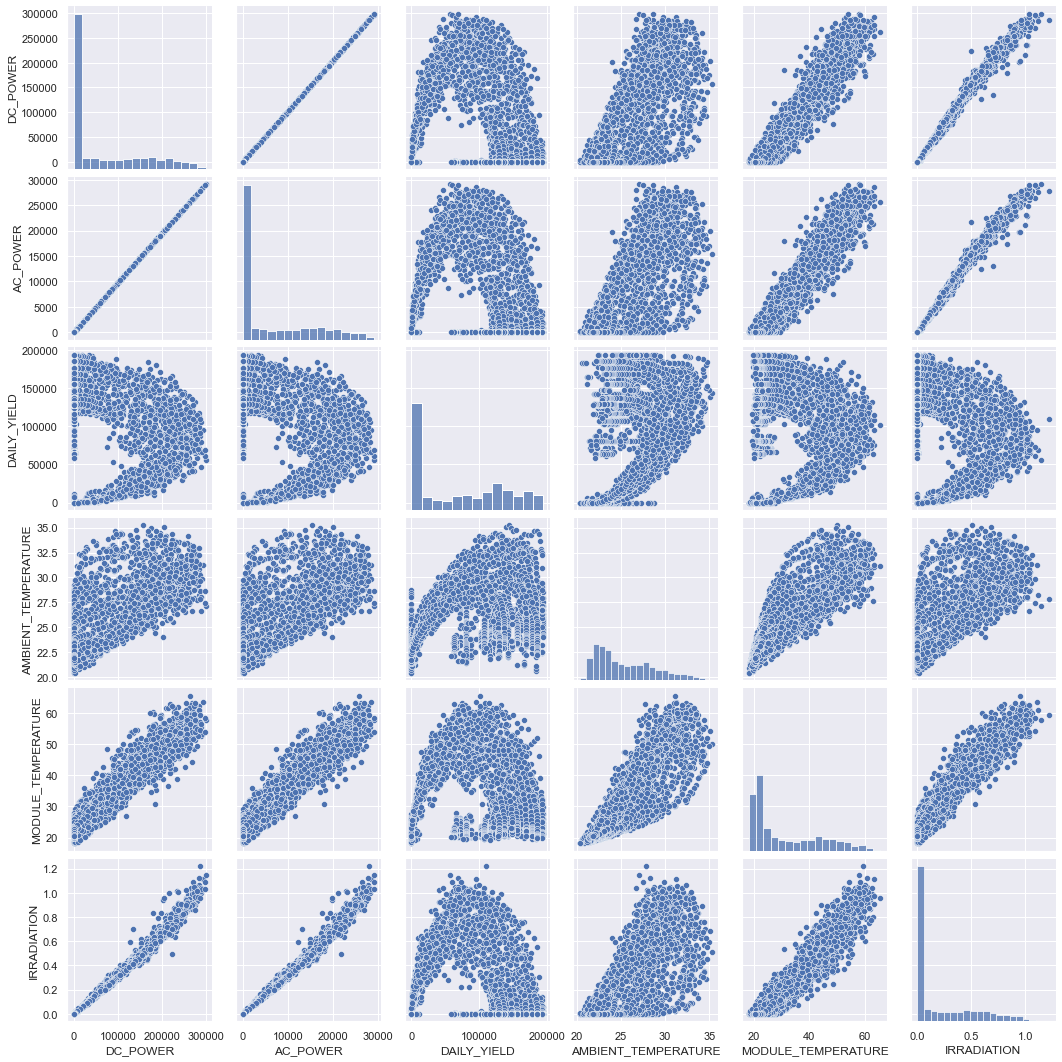

In [21]:
#insight da relação entre as variaveis
sns.pairplot(usine_one[['DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']])

Text(0, 0.5, 'DC POWER')

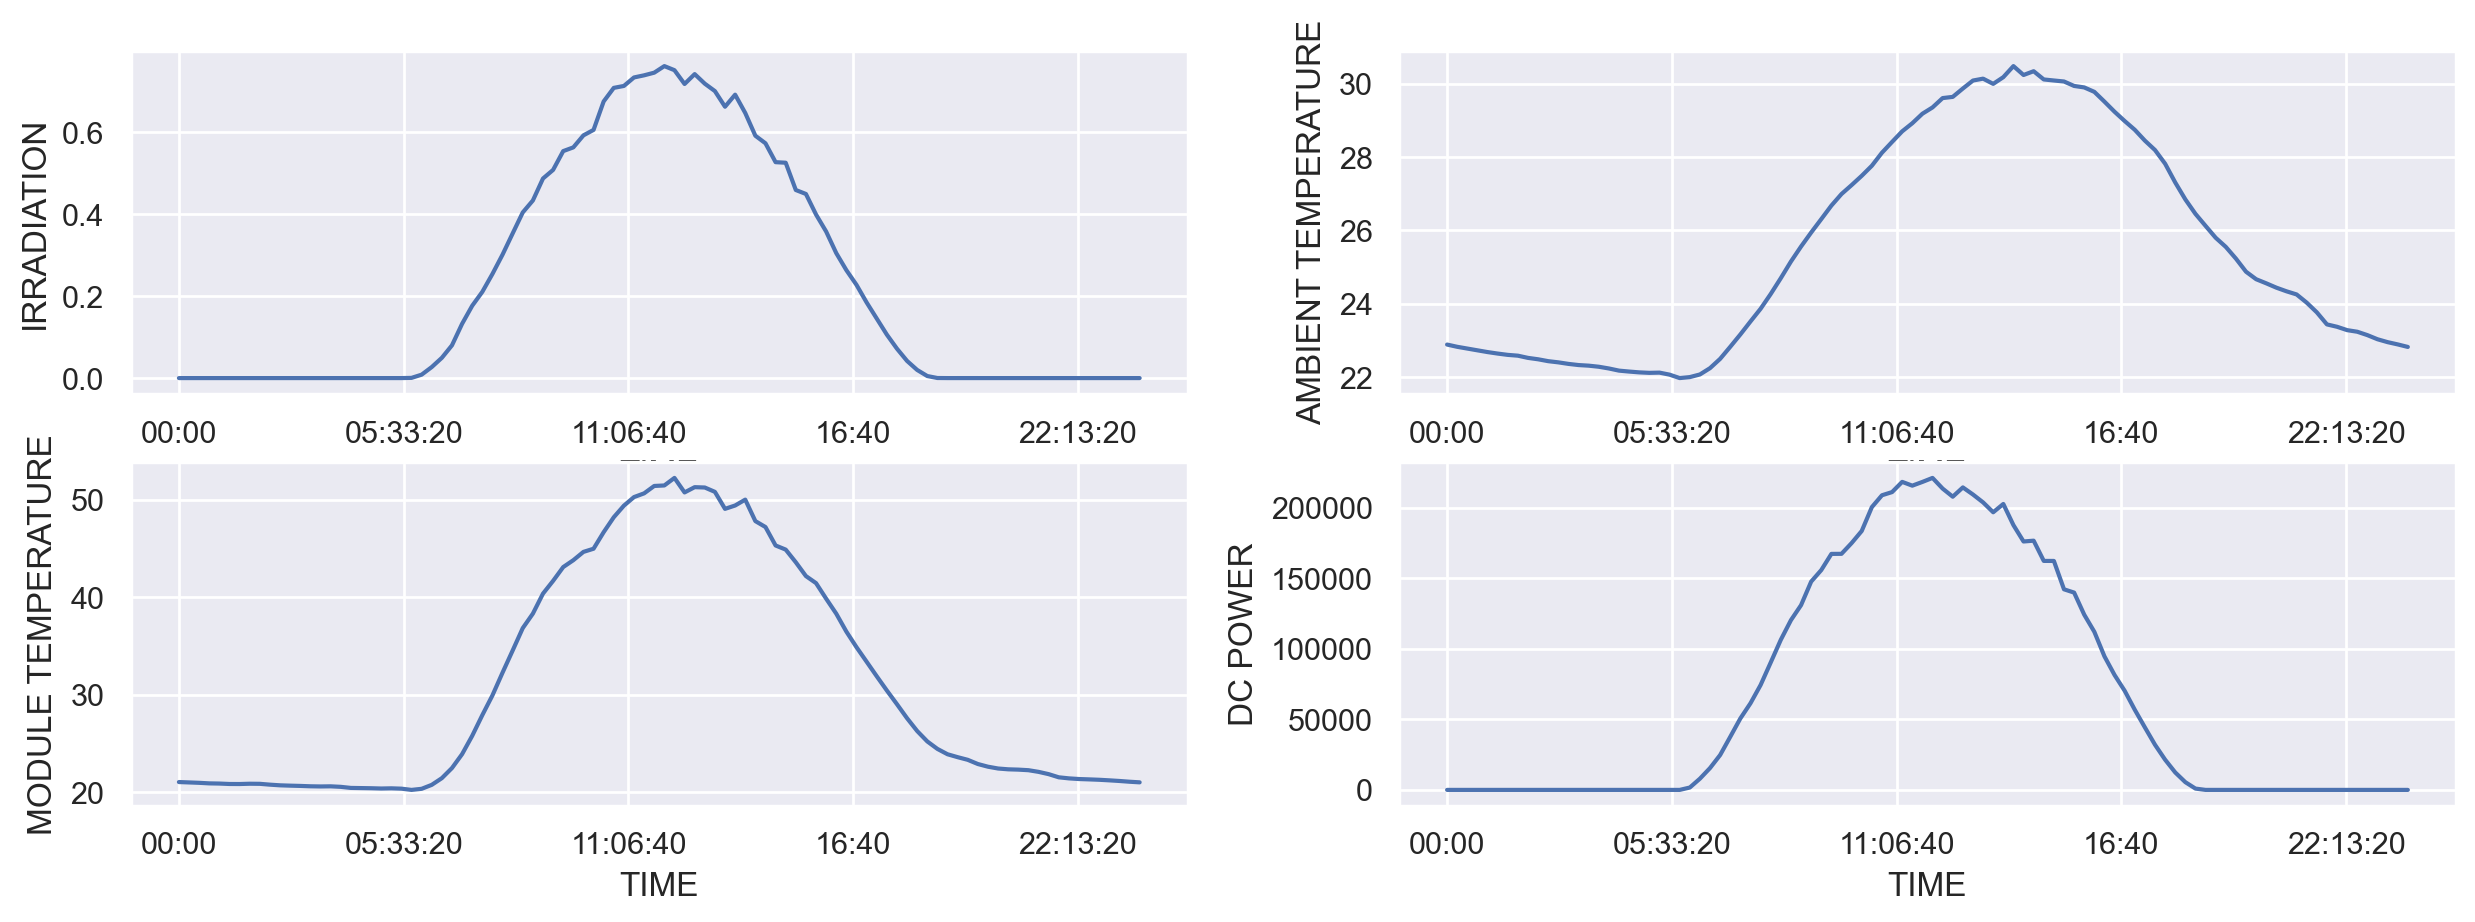

In [22]:
#observando o comportamento das variaveis de clima e da geração dos módulos FV
usine_one_weather = usine_one.copy()
weather_dc = usine_one_weather.groupby(['TIME']).mean()

fig,ax=plt.subplots(ncols=2,nrows=2,dpi=200,figsize=(15,5))
weather_dc['IRRADIATION'].plot(ax=ax[0,0])
weather_dc['AMBIENT_TEMPERATURE'].plot(ax=ax[0,1])
weather_dc['MODULE_TEMPERATURE'].plot(ax=ax[1,0])
weather_dc['DC_POWER'].plot(ax=ax[1,1])

ax[0,0].set_ylabel('IRRADIATION')
ax[0,1].set_ylabel('AMBIENT TEMPERATURE')
ax[1,0].set_ylabel('MODULE TEMPERATURE')
ax[1,1].set_ylabel('DC POWER')

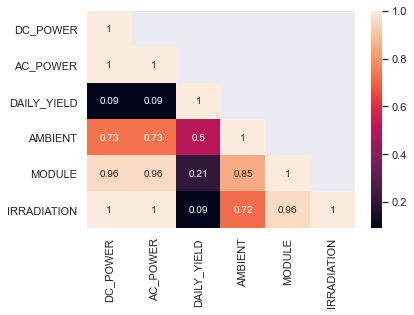

In [25]:
#Correlação entre as variaveis da usina para a escolha da mais apropriada para geração DC
usine_one1.columns = ['DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT','MODULE','IRRADIATION']
one_correlation = usine_one1[['DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT','MODULE','IRRADIATION']]
corr = one_correlation.corr()

fig_dims = (2, 2) 
sns.heatmap(round(corr,2), annot=True, mask=(np.triu(corr,+1)))
plt.savefig('correla.png',format = 'png')

In [26]:
#após a escolha das variaveis com maior correlação, separação final da base de dados
data_one = usine_one[['DC_POWER','MODULE_TEMPERATURE','IRRADIATION']]
data_one.describe()
one = usine_one[['DC_POWER','DATE_TIME']]

In [27]:
#importação das bibliotecas da Rede Neural
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [28]:
#Selecionando a base de treinamento e teste
#sendo 70% para treinamento e 30% teste
base_treinamento = data_one[0:int(0.7*len(data_one))]
base_teste = data_one[int(0.7*len(data_one)):]
base_treinamento[50:60]

,DC_POWER,MODULE_TEMPERATURE,IRRADIATION
50,197884.500010,52.353255,0.649248
51,209419.238093,50.631240,0.761243
52,129842.357143,49.610768,0.416035
53,149740.553574,47.011161,0.489244
54,175573.464286,46.669863,0.574561
55,170970.589284,47.516884,0.560986
56,222438.714294,49.803904,0.735083
57,259813.285720,55.030613,0.893661
58,142901.932142,54.519137,0.466789
59,160715.529762,47.618195,0.542138


In [29]:
a = base_treinamento.iloc[:,0:1]

In [30]:
#normalizando a base de dados e teste
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
normalizador_previsao = MinMaxScaler(feature_range=(0,1))
normalizador_previsao.fit_transform(a)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [31]:
#criando listas dos atributos previsores e os valores reais para a RNA
previsores = []
real_dc = []

In [32]:
#preenchendo essas listas
for i in range(100,len(base_treinamento)):
    previsores.append(base_treinamento_normalizada[i-100:i,0:3])
    real_dc.append(base_treinamento_normalizada[i,0])

In [33]:
#trasnformando em array
previsores,real_dc = np.array(previsores),np.array(real_dc)

In [34]:
#RNA LSTM COM DROPOUT PARA O OVERFITING
regressor = Sequential()
regressor.add(LSTM(units=100,return_sequences=True, input_shape =
                   (previsores.shape[1],3)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1,activation='sigmoid'))

regressor.compile(optimizer='adam',loss='mean_squared_error',
                  metrics = ['mean_absolute_error'])

es = EarlyStopping(monitor = 'loss', min_delta= 1e-10, patience=10, verbose = 1)
rlr = ReduceLROnPlateau(monitor='loss', factor = 0.2, patience=5, verbose=1)
mcp = ModelCheckpoint(filepath= 'pesos.h5', monitor='loss', save_best_only=True,
                      verbose=1)


NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
#TREINAMENTO
regressor.fit(previsores,real_dc,epochs=100,batch_size=32,
              callbacks=[es,rlr,mcp])

In [ ]:
#Valores reais de teste
real_dc_teste = base_teste.iloc[:,0:1].values

In [ ]:
#previsores de teste
dado_um = data_one[len(data_one) - len(base_teste) - 100:].values
dado_um = normalizador.transform(dado_um)

In [ ]:
#preenchendo os valores de teste numa lista
X_teste = []
for v in range(100,len(dado_um)):
    X_teste.append(dado_um[v-100:v,0:6])
X_teste = np.array(X_teste)

In [ ]:
#prevendo os valores e transformando a normalização para os numeros reais
previsoes = regressor.predict(X_teste)
previsoes = normalizador_previsao.inverse_transform(previsoes)

In [ ]:
plt.plot(real_dc_teste,color='red',label = 'Potência Real')
plt.plot(previsoes,color='blue',label = 'Previsão')
plt.xlabel('Tempo')
plt.ylabel('Potência kW')
plt.legend()
plt.show()



In [ ]:
from fbprophet import Prophet
pred_gen_all=usine_one.copy()
pred_gen_all=pred_gen_all.groupby('DATE_TIME')['DC_POWER'].sum().reset_index()
pred_gen_all.rename(columns={'DATE_TIME':'ds','DC_POWER':'y'},inplace=True)
#"training set" contains DC power genration data before 2020-06-10, data after 2020-06-10 will be used for "validation set"
pred_gen=pred_gen_all[pred_gen_all['ds']<'2020-06-10'].copy()
pred_gen.plot(x='ds',y='y',figsize=(17,5))
plt.legend('')
plt.title('DC_POWER',size=17)
plt.show()

In [ ]:
m = Prophet(yearly_seasonality=False,daily_seasonality=True)
m.fit(pred_gen)
future =m.make_future_dataframe(periods=7*24*4,freq='15min')
forecast = m.predict(future)
plt.plot(forecast.set_index('ds')['yhat'],label="prediction")
plt.legend()

In [ ]:
from fbprophet import Prophet

In [ ]:
import keras
import tensorflow

In [ ]:
date = usine_one['DATE_TIME'].to_list()
date_teste = date[int(0.7*len(data_one)):]
date_teste = pd.DataFrame(date_teste)
date_teste.columns = ['DATE']
date_teste

In [ ]:
date = usine_one['DATE_TIME'].to_list()

date_treinamento = date[0:int(0.7*len(data_one))]
date_treinamento = pd.DataFrame(date_treinamento)
date_treinamento.columns = ['DATE']
date_treinamento

In [ ]:
df = pd.DataFrame(previsoes)
df.columns = ["DC_POWER"]
df = df.assign(DATE = date_teste)
df_real = pd.DataFrame(real_dc_teste)
df_real.columns = ["DC_POWER"]
df_real = df_real.assign(DATE = date_teste)
df_treinamento = pd.DataFrame(real_dc)
df_treinamento = df_treinamento.assign(DATE = date_treinamento)

In [ ]:
df_real

In [ ]:
fato = df.groupby(['DATE']).mean()
fato
fato_real = df_real.groupby(['DATE']).mean()
fato_treinamento = df_treinamento.groupby(['DATE']).mean()

In [ ]:

fig,ax=plt.subplots(ncols=1,nrows=2,dpi=200,figsize=(15,5))
fato_real['DC_POWER'].plot(ax=ax[0], color = 'black')
fato['DC_POWER'].plot(ax=ax[1])

ax[0].axes.get_xaxis().set_visible(False)
ax[0].set_title('Previsão')
ax[1].set_title('Potência Real')
ax[0].set_ylabel('Potência kW')
ax[1].set_ylabel('Potência kW')
ax[1].set_xlabel('Tempo em Dias')

plt.savefig('70forecast.png', format = 'png')

In [ ]:
pred_gen_all=usine_one.groupby('DATE_TIME')['DC_POWER'].mean().reset_index()
pred_gen_all.rename(columns={'DATE_TIME':'ds','DC_POWER':'y'},inplace=True)
df= pred_gen_all.copy()
df=df.set_index('ds')
split_date = pd.Timestamp('2020-06-08 02:30:00')
train = df.loc[:split_date]
test = df.loc[split_date:]

plt.figure(figsize=(15, 9))

ax = train.plot()

test.plot(ax=ax)
plt.ylabel('Potência Contínua kW')
plt.xlabel('Tempo em dias')
plt.legend(['Base de Terinamento', 'Base de Teste'])
plt.savefig('base70.png', format = 'png')

In [ ]:
pred_gen_all

In [ ]:
print(f'{previsoes[1]},{real_dc_teste[1]}')DC_POWER

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

precisao = r2_score(real_dc_teste,previsoes)
precisao

In [ ]:
erro  = mean_squared_error(real_dc_teste,previsoes)
erro/len(previsoes)